# AiiDA on ComputerCanada Setup Guide

## 1. AiiDA on ComputerCanada
- **Clusters:** Cedar, Narval, Beluga, Graham.
- **Documentation:** [Alliance AiiDA Documentation](https://docs.alliancecan.ca/wiki/AiiDA)

## 2. Automate Nodes (Without Attended Connections)
**Hostnames:**
- **Cedar:** `robot.cedar.alliancecan.ca`
- **Graham:** `robot.graham.alliancecan.ca`
- **Béluga:** `robot.beluga.alliancecan.ca`
- **Narval:** `robot.narval.alliancecan.ca`
- **Niagara:** `robot.niagara.alliancecan.ca`

## 3. Setup SSH Keys to Avoid Multifactor Authentication

### 3.1 Use the modified version of `aiida_commands.sh` from ComputerCanada support team of Pawel:
Login to the clusters where you want to use the robot nodes for AiiDA submissions using:

```bash
wget https://raw.githubusercontent.com/ComputeCanada/software-stack-custom/main/bin/computecanada/allowed_commands/aiida_commands.sh
chmod u+x aiida_commands.sh
chmod u-w aiida_commands.sh


### 3.2 Generate `ed25519` Keys Locally

Generate an `ed25519` SSH key pair, modify the format of the public key, and upload it to your Alliance account.

```bash
restrict,from="128.100.18.187",command="/home/juhuang/aiida_commands.sh /scratch/juhuang/aiida" ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAIOwufZN6eWydTmO/LLnrtneoLK5w0oUqB+zLX6ql8sc2


(Here, aiida_commands.sh is on HPC /home/juhuang, and work will be run in /scratch/juhuang/aiida)

###  3.3 Manage locally `~/.ssh/config` to make sure AiiDA will use the right private ssh key to submit work to RobotNodes.
For example:

```bash
Host CedarRobot
    Hostname robot.cedar.alliancecan.ca
    User juhuang
    Identityfile ~/.ssh/id_ed25519
    Identitiesonly yes
    Requesttty no


### 3.4 Can only generate 1 `ed_25519` key for all clusters of ComputerCanada, use command below to add server into the known_hosts file.

```bash
ssh-keyscan -H robot.beluga.alliancecan.ca >> ~/.ssh/known_host


# AiiDA Installation on Local PC / Workstation

```bash
conda create -n py37 python=3.7
conda activate py37


## Install oximachinerunner firstly:
```bash
pip install git+https://github.com/kjappelbaum/oximachinerunner.git


## Install `aiida-core` and `aiida-lsmo` packages: 
```bash
git clone https://github.com/lsmo-epfl/aiida-lsmo .
cd aiida-lsmo
pip install -e .


## CP2K-9.1 with DDEC, in this branch they did modification to the workchains.py file to parser data from cp2k-9.1 version
```bash
git clone -b support/aiida-1.6.X https://github.com/lsmo-epfl/aiida-ddec.git
cd aiida-ddec
pip install .


# Using AiiDA to Submit Work to HPC

In [2]:
!verdi status

/home/juhuang/anaconda3/envs/test_oximachine_runner/lib/python3.7/site-packages/paramiko/transport.py:33: CryptographyDeprecationWarning: Python 3.7 is no longer supported by the Python core team and support for it is deprecated in cryptography. A future release of cryptography will remove support for Python 3.7.
  from cryptography.hazmat.backends import default_backend
/home/juhuang/anaconda3/envs/test_oximachine_runner/lib/python3.7/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "cipher": algorithms.TripleDES,
/home/juhuang/anaconda3/envs/test_oximachine_runner/lib/python3.7/site-packages/paramiko/transport.py:253: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.cipher

```bash
verdi profile setup


In [8]:
!verdi profile show

/home/juhuang/anaconda3/envs/test_oximachine_runner/lib/python3.7/site-packages/paramiko/transport.py:33: CryptographyDeprecationWarning: Python 3.7 is no longer supported by the Python core team and support for it is deprecated in cryptography. A future release of cryptography will remove support for Python 3.7.
  from cryptography.hazmat.backends import default_backend
/home/juhuang/anaconda3/envs/test_oximachine_runner/lib/python3.7/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "cipher": algorithms.TripleDES,
/home/juhuang/anaconda3/envs/test_oximachine_runner/lib/python3.7/site-packages/paramiko/transport.py:253: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.cipher

## Start Daemon by:
```bash
verdi daemon start


## Using AiiDA to submit job to HPC, computers and codes should be setup first
### Computer setup
```bash
verdi computer setup -n --config py37_aiida1_BelugaRobot-setup.yaml


### py37_aiida1_BelugaRobot-setup.yaml
```bash
append_text: ''
description: Beluga Automate Nodes
hostname: robot.beluga.alliancecan.ca
label: BelugaRobot
mpirun_command: 'srun --cpus-per-task=1'
prepend_text: ''
scheduler: slurm
shebang: '#!/bin/bash'
transport: ssh
use_double_quotes: true
work_dir: /scratch/juhuang/aiida


### Code on computer setup
```bash
verdi code setup -n --config py37_aiida1_cp2k-9.1@BelugaRobot.yml


### py37_aiida1_cp2k-9.1@BelugaRobot.yml
(Do not include the nodes, cpus, time and mem in the code setup in case you need to use the same code for different systems calculations, make it be flexible. These can be set in the python job script.)
```bash 
label: "cp2k-9.1"
description: "CP2K 9.1 compiled by Beluga with runing RobotNode"
input_plugin: "cp2k"
remote_abs_path: "/cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/MPI/intel2020/openmpi4/cp2k/9.1/bin/cp2k.psmp"
computer: "BelugaRobot"
prepend_text: |
  #SBATCH --account=def-moosavi5
  #SBATCH --cpus-per-task=1
  #SBATCH --mem=0
  #SBATCH -p default
  module --force purge
  module load StdEnv/2020 intel/2020.1.217 openmpi/4.0.3 cp2k/9.1
  export CP2K_DATA_DIR=/home/juhuang/software/aiida-lsmo-codes/data/cp2k/data
append_text: ""


### Computer and code setup test
```bash
verdi computer test BelugaRobot
verdi code test py37_aiida1_cp2k-9.1@BelugaRobot


## Simple example

In [15]:
from aiida import load_profile
load_profile()
from aiida import orm
n1=orm.Int(2)
n1.store()
n1

<Int: uuid: 7c55ea31-14a9-4951-acba-54f656eec1ea (pk: 78241) value: 2>

In [19]:
from aiida import engine
@engine.calcfunction
def multiply(x,y):
    return x * y 

In [20]:
x=orm.load_node(pk=78241)
y=orm.Int(3)
multiply(x,y)

<Int: uuid: 74de4a70-d98d-49ad-ad52-d38fe55ec14c (pk: 78244) value: 6>

In [22]:
!verdi node graph generate 78244

/home/juhuang/anaconda3/envs/test_oximachine_runner/lib/python3.7/site-packages/paramiko/transport.py:33: CryptographyDeprecationWarning: Python 3.7 is no longer supported by the Python core team and support for it is deprecated in cryptography. A future release of cryptography will remove support for Python 3.7.
  from cryptography.hazmat.backends import default_backend
/home/juhuang/anaconda3/envs/test_oximachine_runner/lib/python3.7/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "cipher": algorithms.TripleDES,
/home/juhuang/anaconda3/envs/test_oximachine_runner/lib/python3.7/site-packages/paramiko/transport.py:253: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.cipher

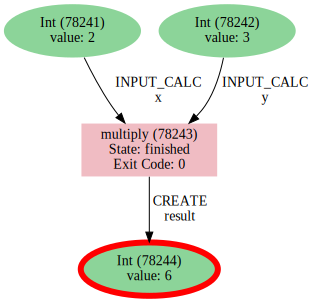

In [27]:
from aiida.tools.visualization import Graph
graph=Graph()
calc_node=orm.load_node(78244)
graph.recurse_ancestors(calc_node, annotate_links='both')
graph.recurse_descendants(calc_node, annotate_links='both')
graph.graphviz

In [28]:
print(dir(graph))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_convert_link_types', '_default_link_types', '_edges', '_global_edge_style', '_global_node_style', '_graph', '_ignore_node_style', '_include_sublabels', '_link_styles', '_load_node', '_node_id_type', '_node_styles', '_node_sublabels', '_nodes', '_origin_node_style', 'add_edge', 'add_incoming', 'add_node', 'add_origin_to_targets', 'add_origins_to_targets', 'add_outgoing', 'edges', 'graphviz', 'nodes', 'recurse_ancestors', 'recurse_descendants']


## Example of CP2K StrucOpt Workflow

In [5]:
from aiida import load_profile
from aiida.orm import QueryBuilder
from aiida.plugins import WorkflowFactory, CalculationFactory

load_profile()

Cp2kMultistageWorkChain = WorkflowFactory("lsmo.cp2k_multistage")
Cp2kBaseWorkChain = WorkflowFactory("cp2k.base")
Cp2kCalculation = CalculationFactory("cp2k")

query = QueryBuilder()
query.append(Cp2kMultistageWorkChain, filters={'label': {'like': '%qmof-d4963a6%'}}, tag='root')
roots = query.all(flat=True)
for node in roots:
    print(node.pk, node.label, node.ctime)

/home/juhuang/anaconda3/envs/test_oximachine_runner/lib/python3.7/site-packages/sqlalchemy_utils/types/encrypted/encrypted_type.py:17: CryptographyDeprecationWarning: Python 3.7 is no longer supported by the Python core team and support for it is deprecated in cryptography. A future release of cryptography will remove support for Python 3.7.
  import cryptography


78137 SinglePoint_qmof-d4963a6 2025-03-27 15:47:26.515631+00:00
78112 Test_qmof-d4963a6_SO_Robust_Standard_noMD 2025-03-27 15:39:57.551836+00:00
78215 Test_qmof-d4963a6_SO_standard_noMD_Beluga 2025-03-27 19:30:42.844875+00:00


/home/juhuang/anaconda3/envs/test_oximachine_runner/lib/python3.7/site-packages/aiida/orm/querybuilder.py:271: AiidaEntryPointWarning: Process type 'aiida_lsmo.workchains.cp2k_multistage.Cp2kMultistageWorkChain' does not correspond to a registered entry. This risks queries to fail once the location of the process class changes. Add an entry point for 'aiida_lsmo.workchains.cp2k_multistage.Cp2kMultistageWorkChain' to remove this warning.
  "Add an entry point for '{value}' to remove this warning.".format(value=value), AiidaEntryPointWarning


In [4]:
!verdi node show 78215

/home/juhuang/anaconda3/envs/test_oximachine_runner/lib/python3.7/site-packages/paramiko/transport.py:33: CryptographyDeprecationWarning: Python 3.7 is no longer supported by the Python core team and support for it is deprecated in cryptography. A future release of cryptography will remove support for Python 3.7.
  from cryptography.hazmat.backends import default_backend
/home/juhuang/anaconda3/envs/test_oximachine_runner/lib/python3.7/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "cipher": algorithms.TripleDES,
/home/juhuang/anaconda3/envs/test_oximachine_runner/lib/python3.7/site-packages/paramiko/transport.py:253: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.cipher

In [46]:
!verdi process report 78215

/home/juhuang/anaconda3/envs/test_oximachine_runner/lib/python3.7/site-packages/paramiko/transport.py:33: CryptographyDeprecationWarning: Python 3.7 is no longer supported by the Python core team and support for it is deprecated in cryptography. A future release of cryptography will remove support for Python 3.7.
  from cryptography.hazmat.backends import default_backend
/home/juhuang/anaconda3/envs/test_oximachine_runner/lib/python3.7/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "cipher": algorithms.TripleDES,
/home/juhuang/anaconda3/envs/test_oximachine_runner/lib/python3.7/site-packages/paramiko/transport.py:253: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.cipher

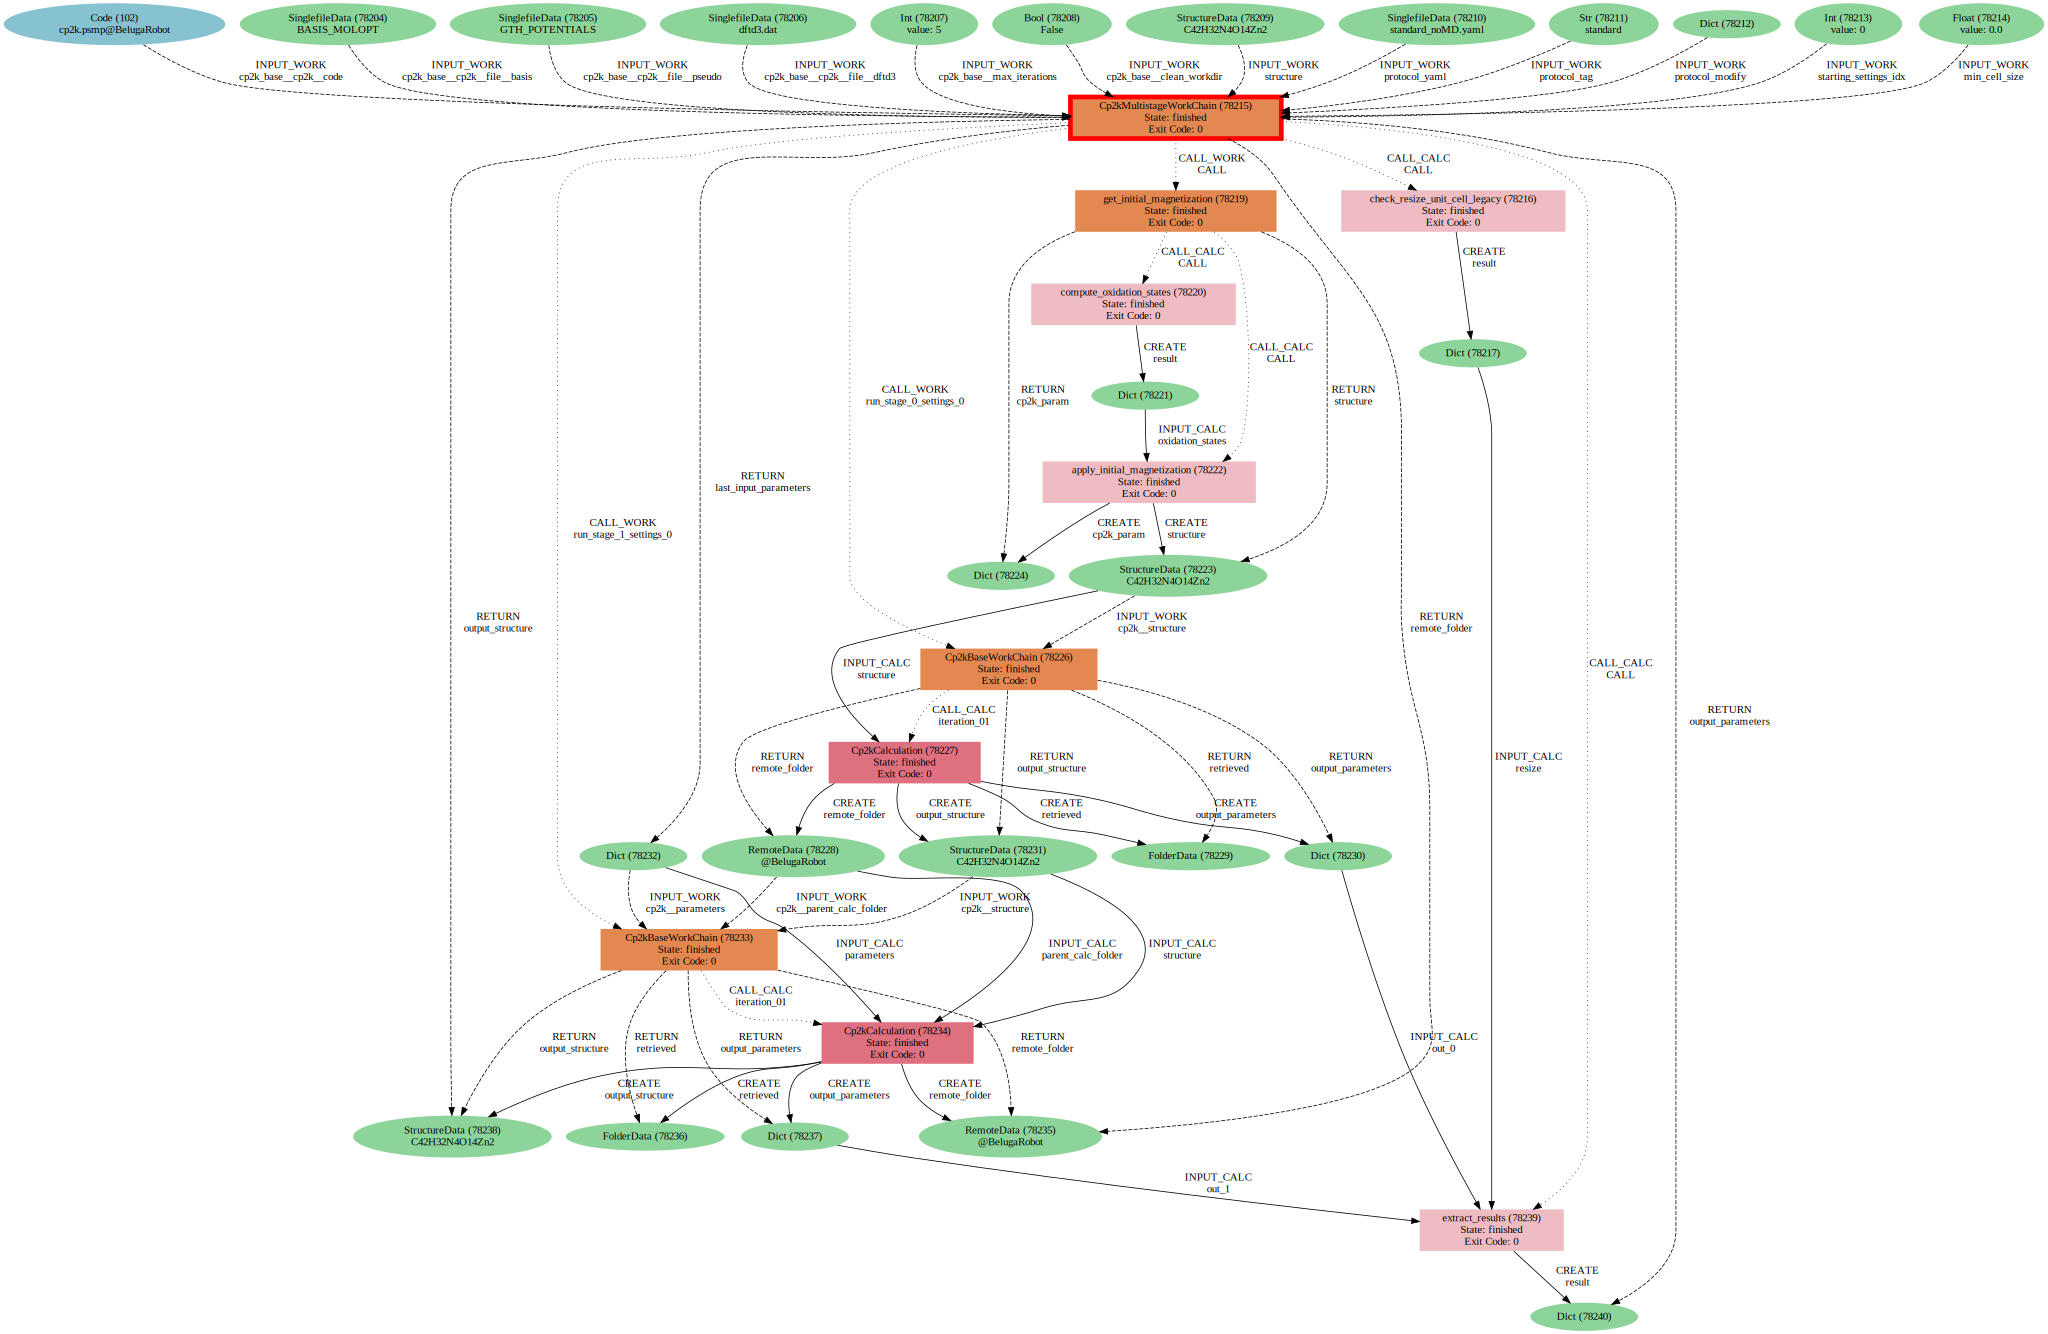

In [32]:
from aiida.tools.visualization import Graph
graph=Graph()
calc_node=orm.load_node(78215)
graph.recurse_ancestors(calc_node, annotate_links='both')
graph.recurse_descendants(calc_node, annotate_links='both')
graph.graphviz

In [6]:
!!verdi node graph generate 78215

['/home/juhuang/anaconda3/envs/test_oximachine_runner/lib/python3.7/site-packages/paramiko/transport.py:33: CryptographyDeprecationWarning: Python 3.7 is no longer supported by the Python core team and support for it is deprecated in cryptography. A future release of cryptography will remove support for Python 3.7.',
 '  from cryptography.hazmat.backends import default_backend',
 '/home/juhuang/anaconda3/envs/test_oximachine_runner/lib/python3.7/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.',
 '  "cipher": algorithms.TripleDES,',
 '/home/juhuang/anaconda3/envs/test_oximachine_runner/lib/python3.7/site-packages/paramiko/transport.py:253: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat

In [38]:
!verdi data singlefile content 78210

/home/juhuang/anaconda3/envs/test_oximachine_runner/lib/python3.7/site-packages/paramiko/transport.py:33: CryptographyDeprecationWarning: Python 3.7 is no longer supported by the Python core team and support for it is deprecated in cryptography. A future release of cryptography will remove support for Python 3.7.
  from cryptography.hazmat.backends import default_backend
/home/juhuang/anaconda3/envs/test_oximachine_runner/lib/python3.7/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "cipher": algorithms.TripleDES,
/home/juhuang/anaconda3/envs/test_oximachine_runner/lib/python3.7/site-packages/paramiko/transport.py:253: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.cipher

In [39]:
!verdi data dict show 78240

/home/juhuang/anaconda3/envs/test_oximachine_runner/lib/python3.7/site-packages/paramiko/transport.py:33: CryptographyDeprecationWarning: Python 3.7 is no longer supported by the Python core team and support for it is deprecated in cryptography. A future release of cryptography will remove support for Python 3.7.
  from cryptography.hazmat.backends import default_backend
/home/juhuang/anaconda3/envs/test_oximachine_runner/lib/python3.7/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "cipher": algorithms.TripleDES,
/home/juhuang/anaconda3/envs/test_oximachine_runner/lib/python3.7/site-packages/paramiko/transport.py:253: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.cipher

            -44.1282621517,
            41.8479285854,
            -19.2277666678,
            45.2053868563,
            -37.2855117419,
            -96.8509773524,
            28.8864030788,
            126.3769288015,
            285.2887763308,
            347.1136396955,
            295.9480817564,
            197.5884824841,
            118.7226604624,
            0.2876109943,
            41.2978513991,
            92.8140050642,
            203.8537661588,
            145.38234966,
            124.6287772977,
            35.8608352482,
            69.9213426064,
            -42.6936092102,
            -81.9216259557,
            -112.2580008502,
            -32.9468622824,
            -109.9669365165,
            -35.6964778686,
            17.6493931383,
            5.6005811977,
            -46.6160192294,
            -65.4533040852,
            -98.1463785995,
            -95.0135148855,
            -28.9372059727,
            -28.6724038384,
            -8.0288846926,
     

In [45]:
root_workflow = load_node(78215) 

def find_final_outputs(process_node):
    if 'output_parameters' in process_node.outputs:
        return process_node.outputs.output_parameters, process_node.outputs.output_structure
    
    for called_node in process_node.called:
        result = find_final_outputs(called_node)
        if result is not None:
            return result
    
    return None

outputs = find_final_outputs(root_workflow)
#print(outputs)

if outputs:
    output_params, output_structure = outputs
    print(f"Output parameters PK: {output_params.pk}")
    print(f"Output structure PK: {output_structure.pk}")
    output_ase=output_structure.get_ase()
    #cif_filename = os.path.join(OUT_DIR, "MOF-5_UnitCell_RobustStandard_opt.cif")
    #ase.io.write(cif_filename, output_ase, format="cif")
else:
    print("No outputs found in the hierarchy.")

Output parameters PK: 78240
Output structure PK: 78238


In [41]:
steps_all=output_params['step_info']['step']
energies_all=output_params['step_info']["energy_au"]
#cell_a_angs_all=output_params['step_info']['cell_a_angs']
#cell_b_angs_all=output_params['step_info']['cell_b_angs']
#cell_c_angs_all=output_params['step_info']['cell_c_angs']
cell_vol_angs3_all=output_params['step_info']['cell_vol_angs3']

In [43]:
## import for matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
import os

%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)      
plt.rc('axes', titlesize=SMALL_SIZE)    
plt.rc('axes', labelsize=SMALL_SIZE)   
plt.rc('xtick', labelsize=SMALL_SIZE)   
plt.rc('ytick', labelsize=SMALL_SIZE)    
plt.rc('legend', fontsize=SMALL_SIZE)   
plt.rc('figure', titlesize=BIGGER_SIZE) 
plt.rc('axes', linewidth=1)
plt.rc('figure', figsize=(3.33,0.75*3.33))
plt.rc('figure', dpi=300)

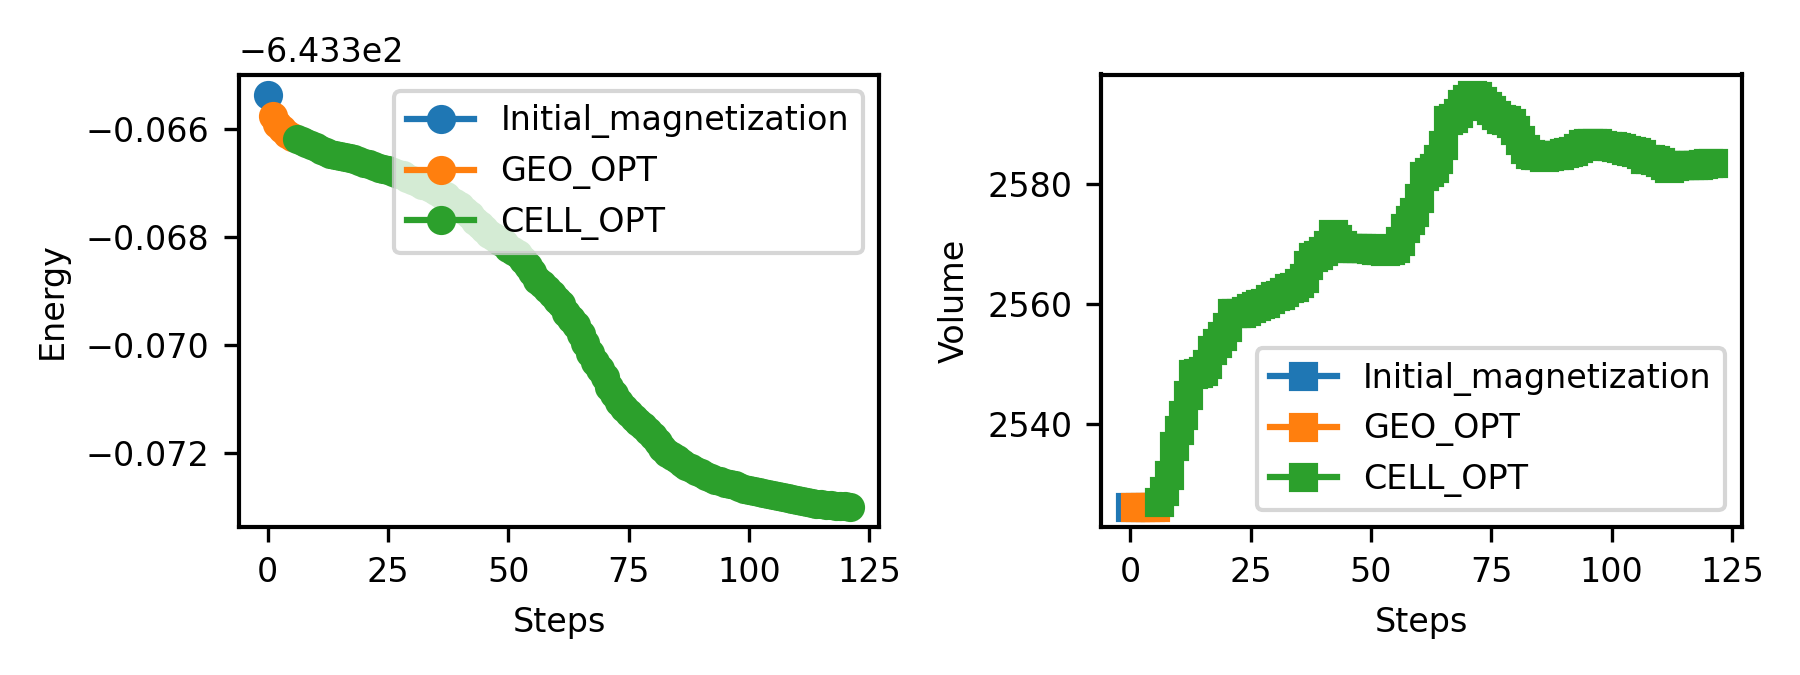

In [44]:
stages = []
current_steps = []
current_energies = []
current_cell_vols = []  

for step, energy, volume in zip(steps_all, energies_all, cell_vol_angs3_all):
    if step == 1 and current_steps:
        stages.append((current_steps, current_energies, current_cell_vols))
        current_steps = []
        current_energies = []
        current_cell_vols = []
    current_steps.append(step)
    current_energies.append(energy)
    current_cell_vols.append(volume)

if current_steps:
    stages.append((current_steps, current_energies, current_cell_vols))

fig, axs = plt.subplots(1, 2, figsize=(3*2,3*0.75))
colors = plt.cm.tab10
stage_names = [
    "Initial_magnetization",
    "GEO_OPT",
    #"NPT_MD",
    "CELL_OPT"
]

offset = 0
for idx, (st_steps, st_energies, st_vols) in enumerate(stages):
    new_steps = [s + offset for s in st_steps]
    color = colors(idx % 10)
    label = stage_names[idx] if idx < len(stage_names) else f"Stage {idx+1}"
    
    axs[0].plot(new_steps, st_energies, marker='o', color=color, label=label)
    axs[1].plot(new_steps, st_vols, marker='s', color=color, label=label)
    
    offset = new_steps[-1]
    
axs[0].set_xlabel("Steps")
axs[0].set_ylabel("Energy")
axs[0].legend()

axs[1].set_xlabel("Steps")
axs[1].set_ylabel("Volume")
axs[1].legend()

plt.tight_layout()
plt.show()
